In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\tabis\OneDrive - Swinburne University\Semester I - 2023\Easter break_Project\ds_salary_proj\Resources\cleaned_job_data.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,is_python,is_knime,is_powerbi,is_d3,is_kaggle,is_MATLAB,is_tensorflow,is_pandas,is_Tableau,is_aws
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,True,False,False,False,False,True,False,False,True,False
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,True,False,False,False,False,False,False,False,False,False
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,True,False,False,True,False,False,False,False,False,False
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,True,False,False,False,False,False,False,False,False,False
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,True,False,False,False,False,False,False,False,False,False


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt_name', 'job_region', 'hq_region',
       'is_at_headquarters', 'is_in_same_region', 'company_age', 'is_r_studio',
       'is_r-studio', 'is_excel', 'is_apache_spark', 'is_python', 'is_knime',
       'is_powerbi', 'is_d3', 'is_kaggle', 'is_MATLAB', 'is_tensorflow',
       'is_pandas', 'is_Tableau', 'is_aws'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'research' in title.lower():
        return 'research scientist'
    elif 'machine learning engineer' in title.lower():
        return 'Machine learning Engineer'
    else:
        return 'na'
    
def seniority(title):
    if any(term in title.lower() for term in ('sr', 'senior', 'lead', 'principal')):
        return 'senior'
    elif any(term in title.lower() for term in ('jr', 'jr.')):
        return 'jr'
    else:
        return 'na'


In [6]:
df['job_simplified'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simplified

0          data scientist
1          data scientist
2          data scientist
3          data scientist
4          data scientist
              ...        
737                    na
738         data engineer
739                    na
740               manager
741    research scientist
Name: job_simplified, Length: 742, dtype: object

In [8]:
df.job_simplified.value_counts()

data scientist               279
na                           168
data engineer                119
analyst                      102
research scientist            26
manager                       22
director                      14
Machine learning Engineer     12
Name: job_simplified, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)

In [10]:
df.seniority

0          na
1          na
2          na
3          na
4          na
        ...  
737    senior
738    senior
739        na
740        na
741        na
Name: seniority, Length: 742, dtype: object

In [11]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [12]:
#fix los angeles in description
# df['job_region'] = df.job_region.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'KA')
df['job_region'] = df['job_region'].apply(lambda x: x.strip() if isinstance(x, str) and x.strip().lower() != 'los angeles' else 'CA')

df.job_region.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_region, dtype: int64

In [13]:
#job description length
df['description_length'] = df['Job Description'].apply(lambda x: len(x))
df.description_length

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: description_length, Length: 742, dtype: int64

In [14]:
#Competitor count
df['competitor_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['competitor_count'], df['Competitors']


(0      0
 1      0
 2      0
 3      3
 4      3
       ..
 737    3
 738    3
 739    0
 740    0
 741    0
 Name: competitor_count, Length: 742, dtype: int64,
 0                                                     -1
 1                                                     -1
 2                                                     -1
 3      Oak Ridge National Laboratory, National Renewa...
 4                   Commerce Signals, Cardlytics, Yodlee
                              ...                        
 737                           Pfizer, AstraZeneca, Merck
 738                      See Tickets, TicketWeb, Vendini
 739                                                   -1
 740                                                   -1
 741                                                   -1
 Name: Competitors, Length: 742, dtype: object)

In [15]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt_name', 'job_region', 'hq_region',
       'is_at_headquarters', 'is_in_same_region', 'company_age', 'is_r_studio',
       'is_r-studio', 'is_excel', 'is_apache_spark', 'is_python', 'is_knime',
       'is_powerbi', 'is_d3', 'is_kaggle', 'is_MATLAB', 'is_tensorflow',
       'is_pandas', 'is_Tableau', 'is_aws', 'job_simplified', 'seniority',
       'description_length', 'competitor_count'],
      dtype='object')

In [16]:
#convert hourly wage to annual
#annaul salary = hourly * 8 * 5 * 50 / 1000 = hourly * 2
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == True else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == True else x.max_salary, axis = 1)
df['average_salary'] = (df['min_salary'] + df['max_salary'])/2
# df['average_salary']

In [17]:
fleetcor_has_hourly_pay = any(df.loc[(df['company_txt_name'] == 'FLEETCOR') & (df['hourly']), 'hourly'])
fleetcor_has_hourly_pay
# # df[df['company_txt_name'] = 'FLEETCOR']
# flec_avg_sal = df.loc[df['company_txt_name'] == 'FLEETCOR', 'average_salary']
# print(flec_avg_sal)


False

In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt_name', 'job_region', 'hq_region',
       'is_at_headquarters', 'is_in_same_region', 'company_age', 'is_r_studio',
       'is_r-studio', 'is_excel', 'is_apache_spark', 'is_python', 'is_knime',
       'is_powerbi', 'is_d3', 'is_kaggle', 'is_MATLAB', 'is_tensorflow',
       'is_pandas', 'is_Tableau', 'is_aws', 'job_simplified', 'seniority',
       'description_length', 'competitor_count'],
      dtype='object')

In [19]:
#remove newline character from company text
df['company_txt_name'] = df['company_txt_name'].apply(lambda x: x.replace('\r', '')).replace('\n', '')
df['company_txt_name']

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_txt_name, Length: 742, dtype: object

In [20]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,company_age,description_length,competitor_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,101.434636,49.389488,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,37.546122,53.962906,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,14.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,27.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,62.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,279.000000,10146.000000,4.000000


<Axes: >

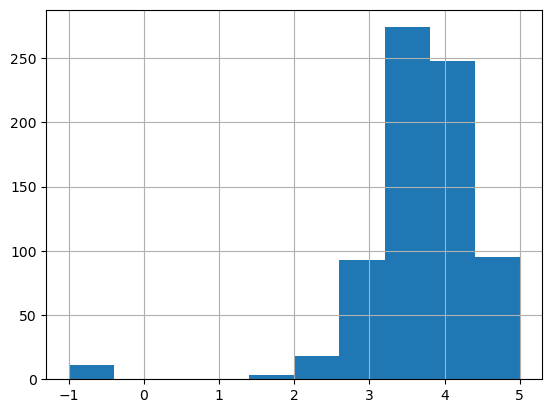

In [21]:
df.Rating.hist()

<Axes: >

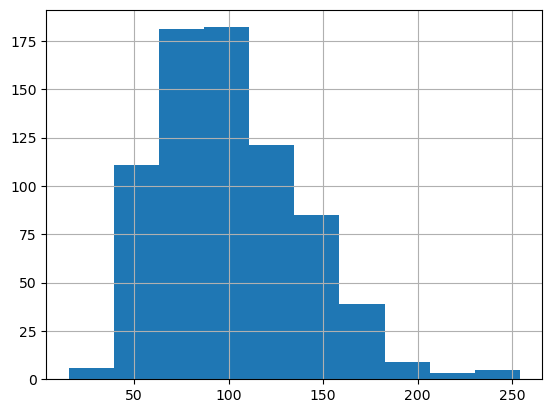

In [22]:
df.average_salary.hist()
# df.average_salary.plot()

<Axes: >

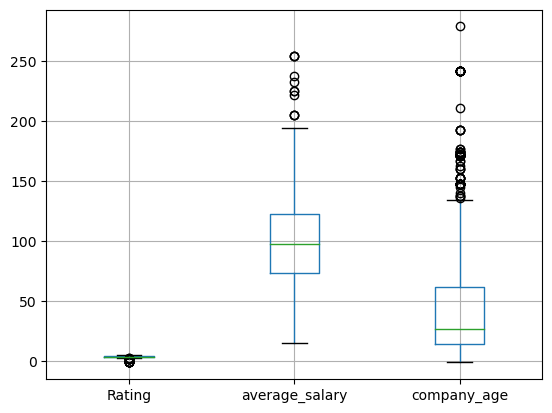

In [23]:
df.boxplot(column = ['Rating', 'average_salary', 'company_age'])

In [24]:
corr_matrix = df[['Rating', 'average_salary', 'company_age', 'description_length']].corr()
corr_matrix

,Rating,average_salary,company_age,description_length
Rating,1.000000,0.012517,0.026164,-0.012631
average_salary,0.012517,1.000000,0.021817,0.069742
company_age,0.026164,0.021817,1.000000,0.165891
description_length,-0.012631,0.069742,0.165891,1.000000


<Axes: >

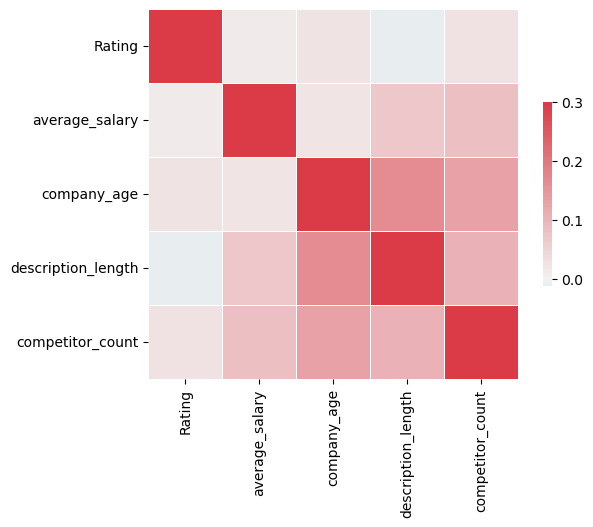

In [25]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[['Rating', 'average_salary', 'company_age', 'description_length', 'competitor_count']].corr(),vmax=0.3, center = 0, cmap = cmap,
            square = True, linewidths = 0.6, cbar_kws={"shrink": 0.5})
               

In [26]:
#categorical data
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt_name', 'job_region', 'hq_region',
       'is_at_headquarters', 'is_in_same_region', 'company_age', 'is_r_studio',
       'is_r-studio', 'is_excel', 'is_apache_spark', 'is_python', 'is_knime',
       'is_powerbi', 'is_d3', 'is_kaggle', 'is_MATLAB', 'is_tensorflow',
       'is_pandas', 'is_Tableau', 'is_aws', 'job_simplified', 'seniority',
       'description_length', 'competitor_count'],
      dtype='object')

In [27]:
df_category = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt_name', 
    'job_region', 'is_in_same_region', 'is_r_studio',
       'is_r-studio', 'is_excel', 'is_apache_spark', 'is_python', 'is_knime',
       'is_powerbi', 'is_d3', 'is_kaggle', 'is_MATLAB', 'is_tensorflow',
       'is_pandas', 'is_Tableau', 'is_aws', 'job_simplified', 'seniority']]

Graph for Location: total: 200


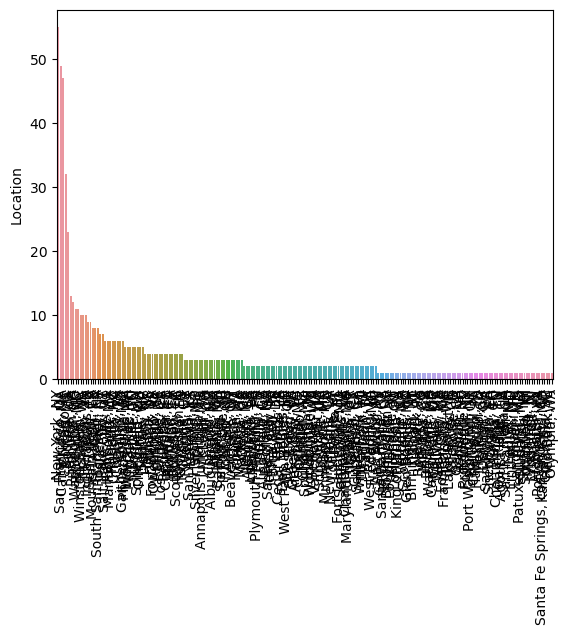

Graph for Headquarters: total: 198


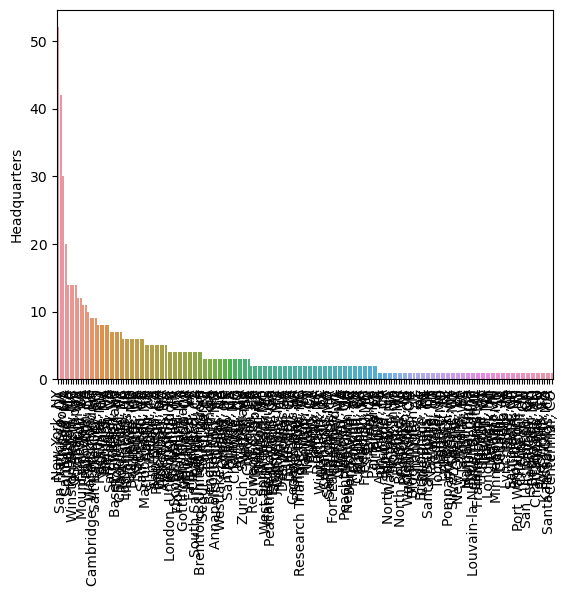

Graph for Size: total: 9


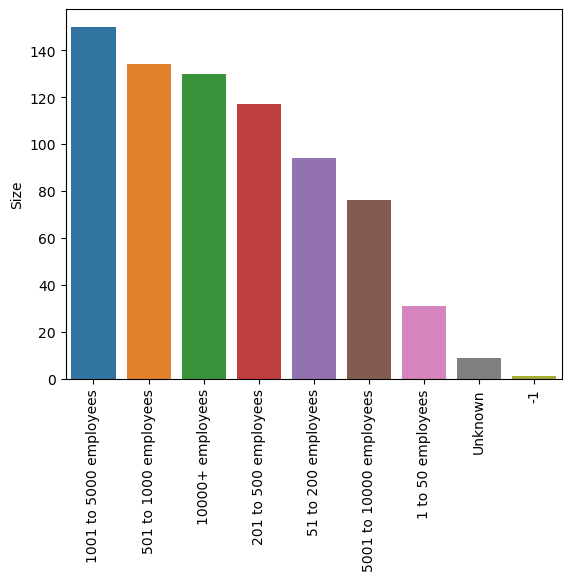

Graph for Type of ownership: total: 11


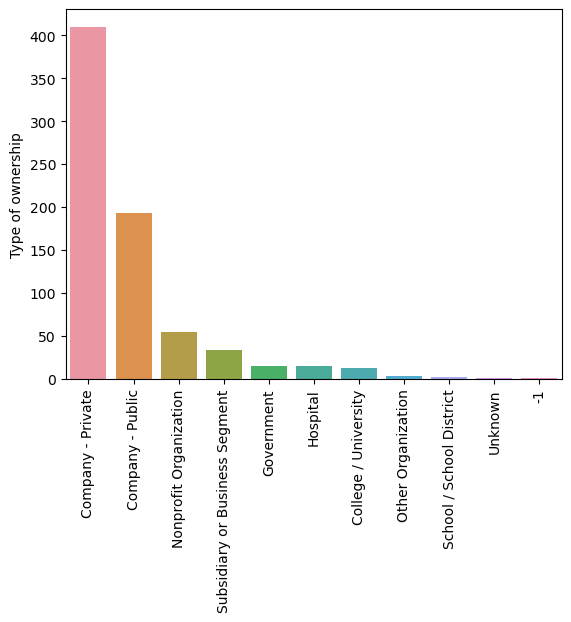

Graph for Industry: total: 60


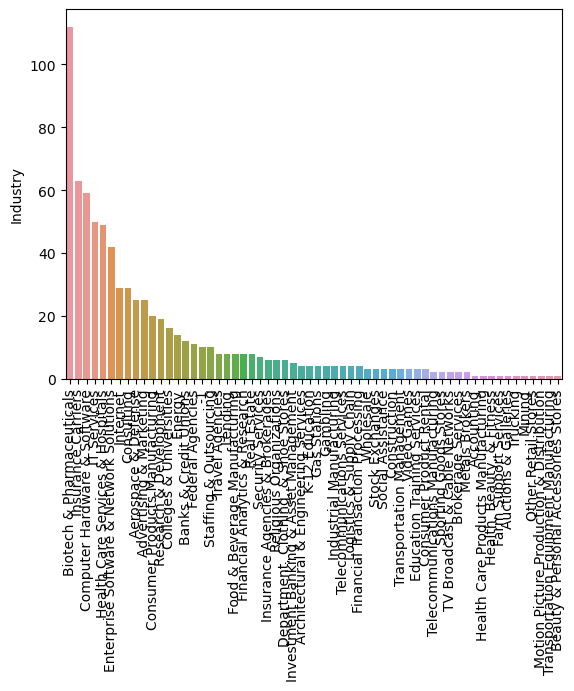

Graph for Sector: total: 25


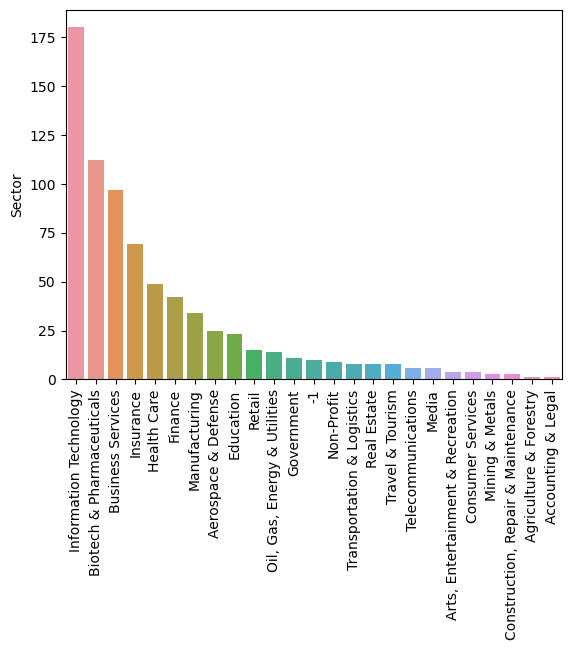

Graph for Revenue: total: 14


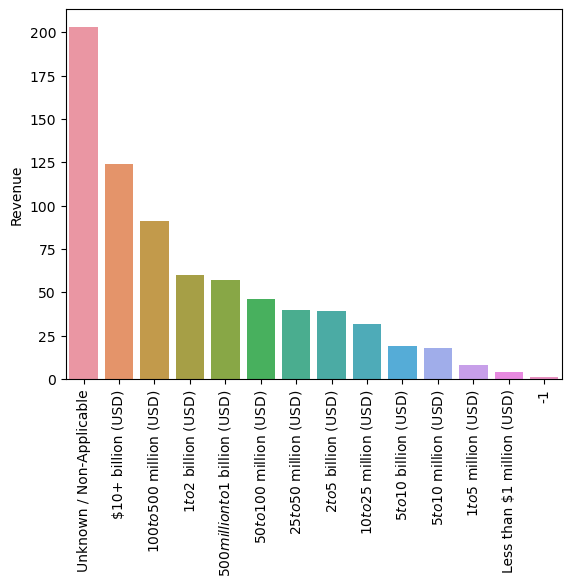

Graph for company_txt_name: total: 343


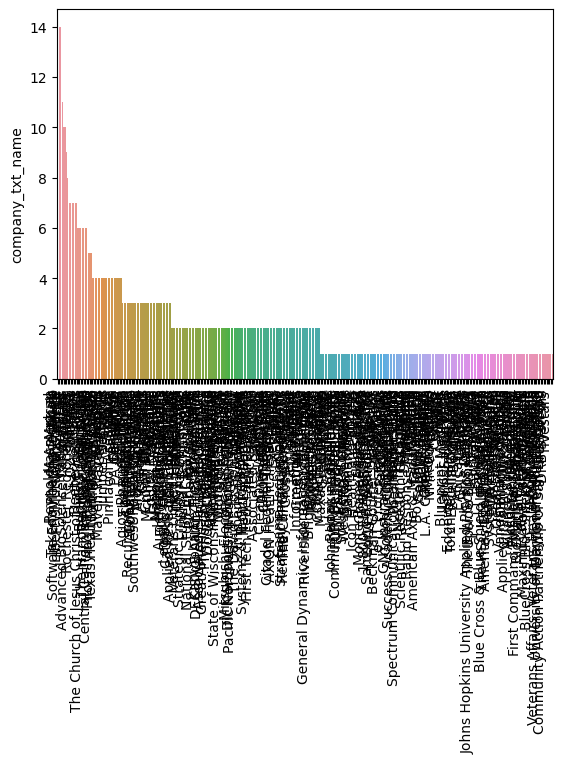

Graph for job_region: total: 37


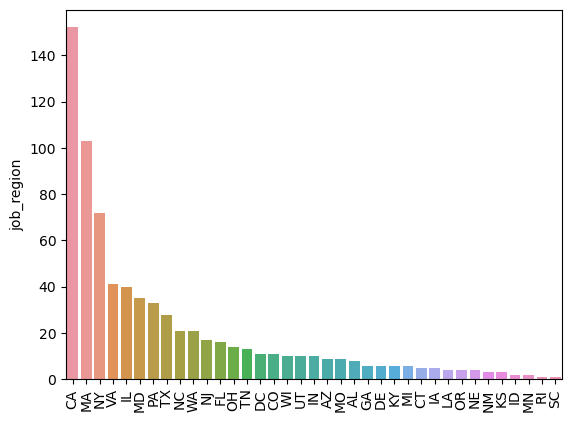

Graph for is_in_same_region: total: 2


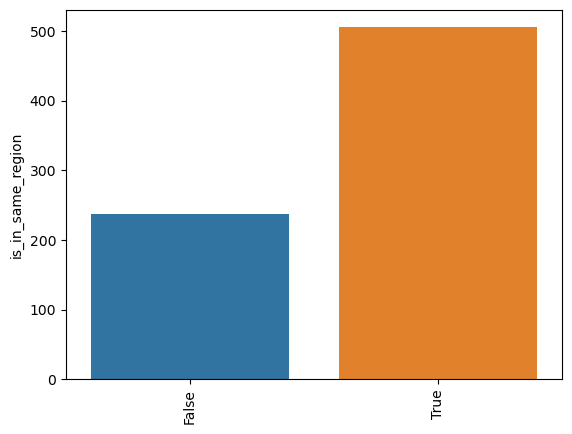

Graph for is_r_studio: total: 2


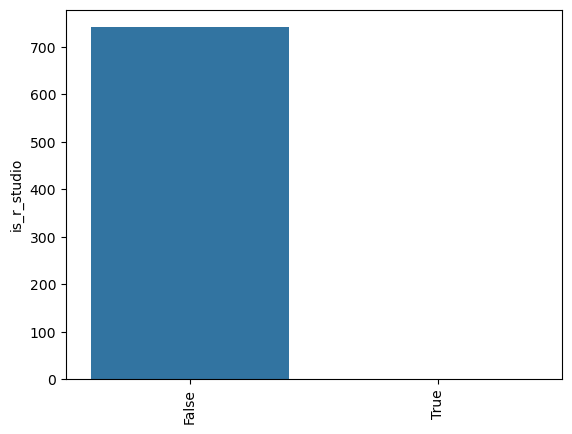

Graph for is_r-studio: total: 2


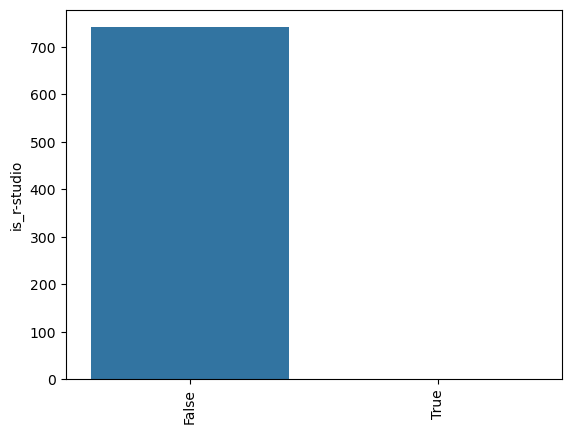

Graph for is_excel: total: 2


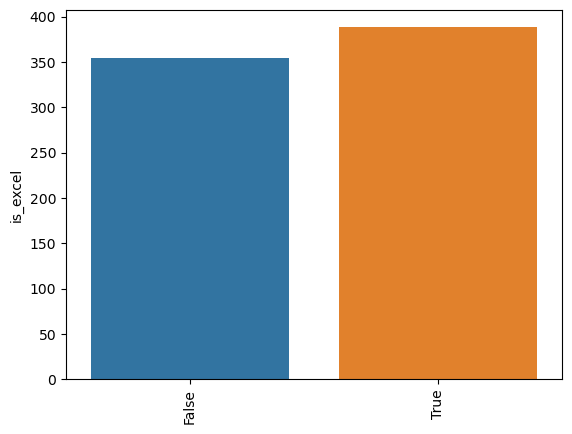

Graph for is_apache_spark: total: 2


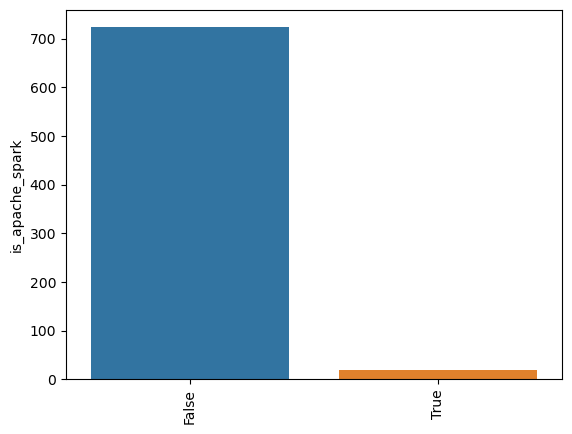

Graph for is_python: total: 2


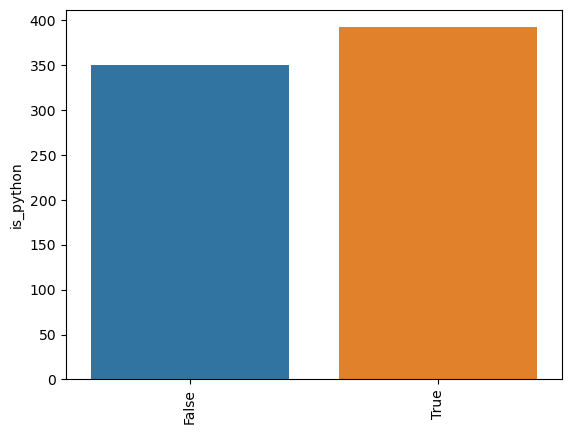

Graph for is_knime: total: 2


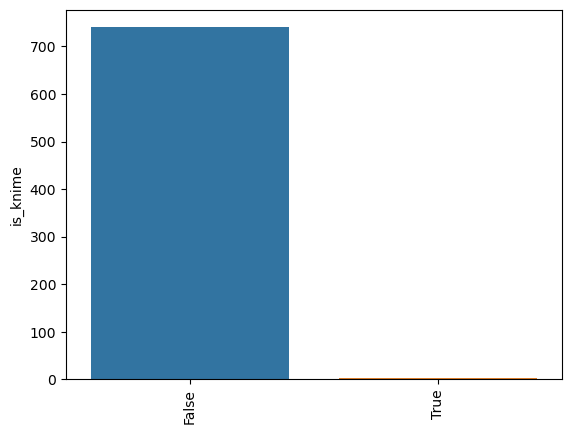

Graph for is_powerbi: total: 2


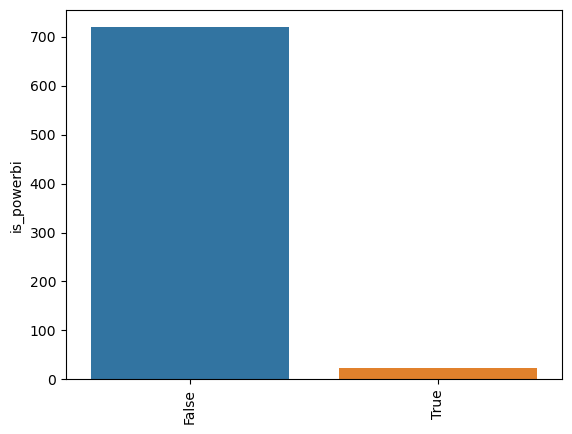

Graph for is_d3: total: 2


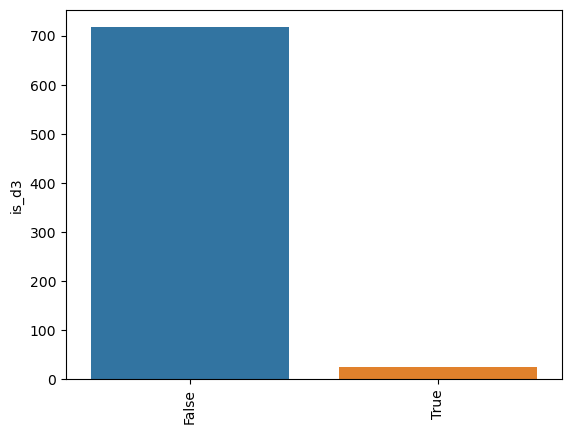

Graph for is_kaggle: total: 2


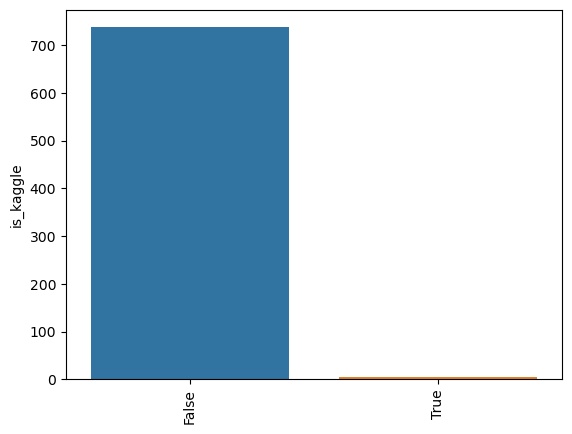

Graph for is_MATLAB: total: 2


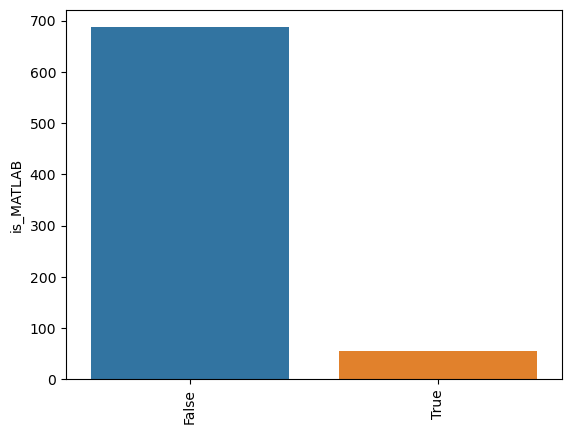

Graph for is_tensorflow: total: 2


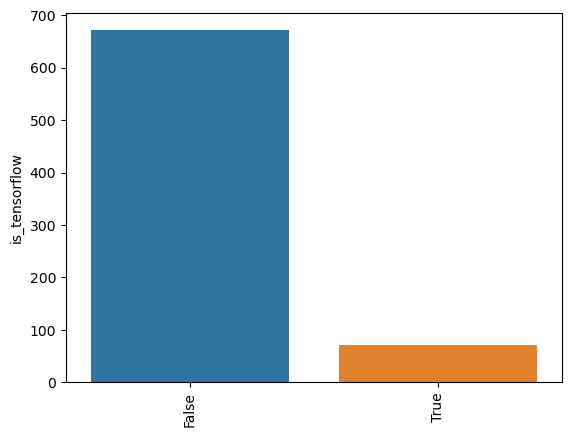

Graph for is_pandas: total: 2


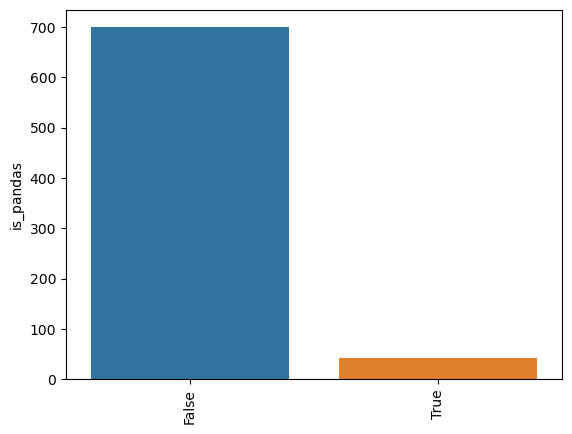

Graph for is_Tableau: total: 2


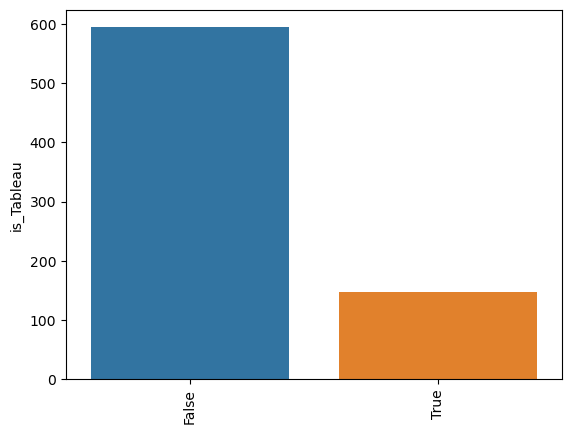

Graph for is_aws: total: 2


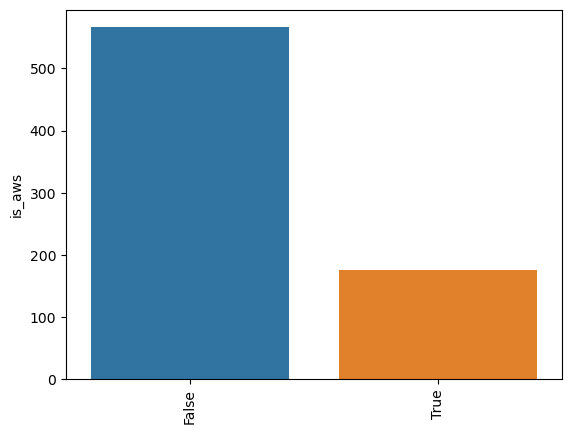

Graph for job_simplified: total: 8


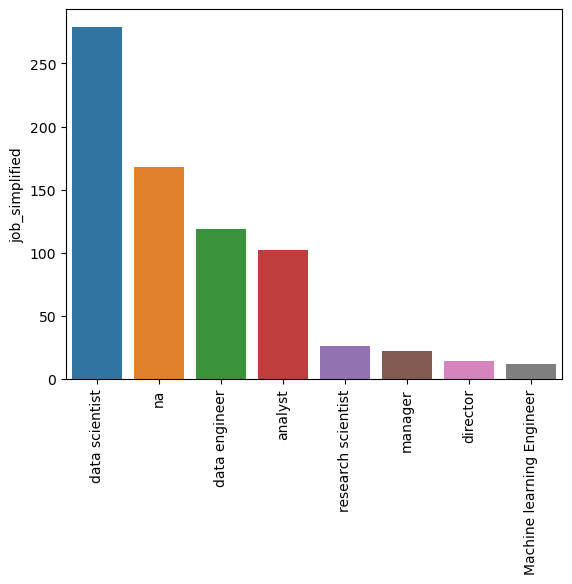

Graph for seniority: total: 3


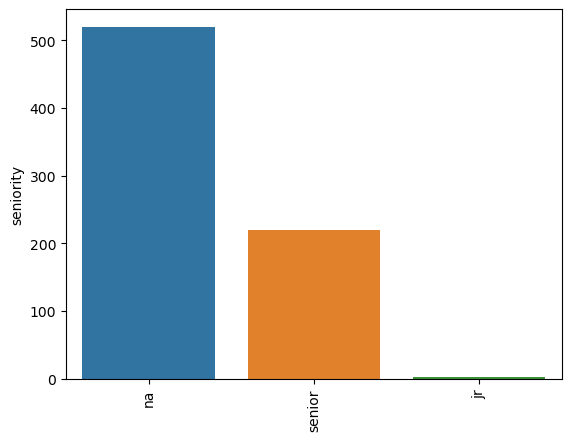

In [28]:
for i in df_category.columns:
    label = df_category[i].value_counts()
    print(f"Graph for {i}: total: {len(label)}")
    sns.barplot(x = label.index, y = label)
    plt.xticks(rotation=90)
    plt.show()

Graph for Location: total: 30


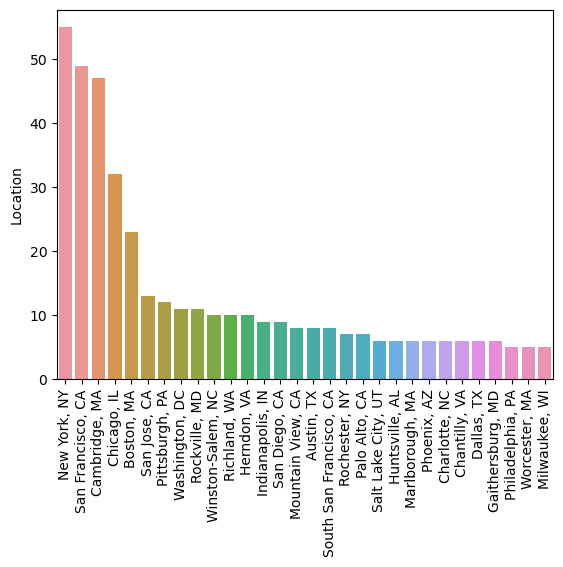

Graph for Headquarters: total: 30


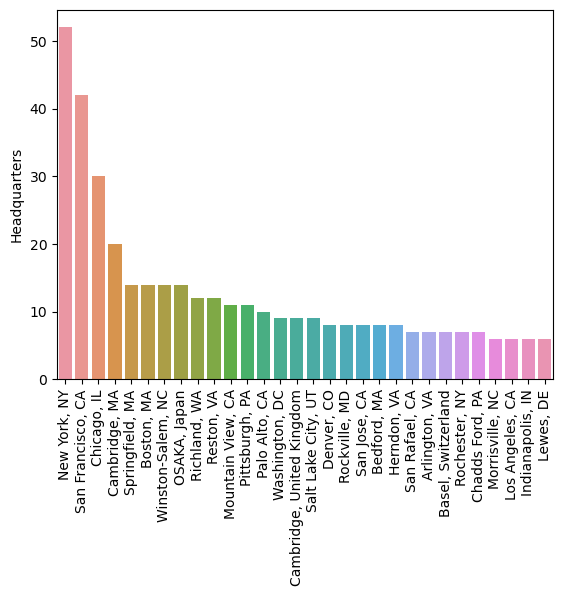

Graph for company_txt_name: total: 30


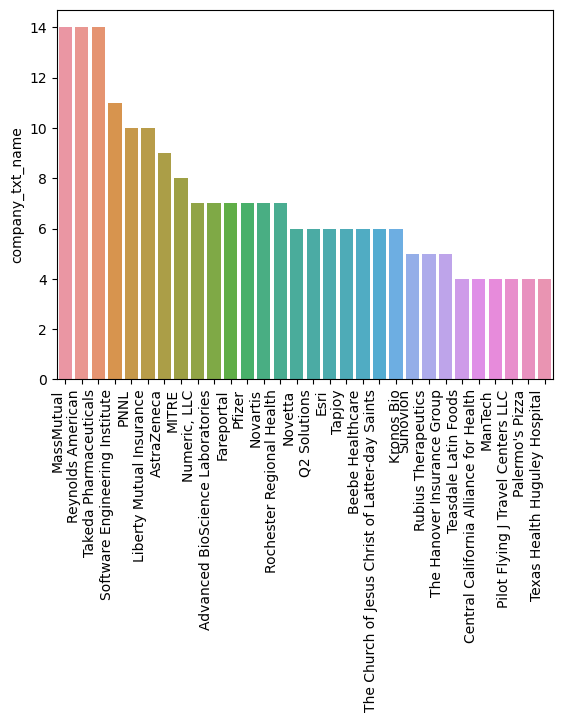

In [29]:
for i in df_category[['Location', 'Headquarters', 'company_txt_name']].columns:
    label = df_category[i].value_counts()[:30]
    print(f"Graph for {i}: total: {len(label)}")
    sns.barplot(x = label.index, y = label)
    plt.xticks(rotation=90)
    plt.show()

In [30]:
pd.pivot_table(df, index = ['job_simplified', 'seniority'] , values = 'average_salary')

average_salary
job_simplified            seniority                
Machine learning Engineer na             119.958333
analyst                   jr              56.500000
                          na              61.155405
                          senior          80.092593
data engineer             na              96.701220
                          senior         124.689189
data scientist            jr             106.500000
                          na             107.043011
                          senior         138.956522
director                  na             168.607143
manager                   na              84.022727
na                        na              77.693966
                          senior         113.384615
research scientist        na              93.178571
                          senior         109.583333

In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt_name', 'job_region', 'hq_region',
       'is_at_headquarters', 'is_in_same_region', 'company_age', 'is_r_studio',
       'is_r-studio', 'is_excel', 'is_apache_spark', 'is_python', 'is_knime',
       'is_powerbi', 'is_d3', 'is_kaggle', 'is_MATLAB', 'is_tensorflow',
       'is_pandas', 'is_Tableau', 'is_aws', 'job_simplified', 'seniority',
       'description_length', 'competitor_count'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

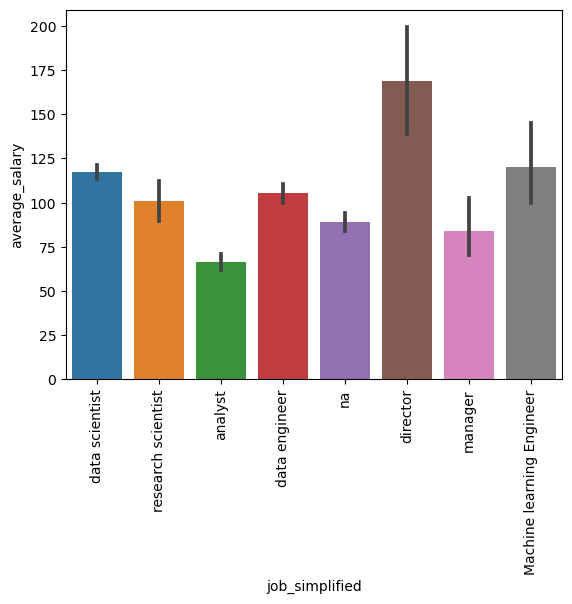

In [32]:
sns.barplot(x = df.job_simplified , y = df.average_salary)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

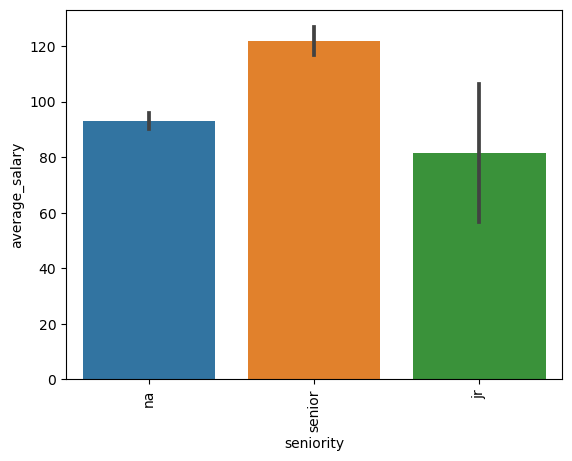

In [33]:

sns.barplot(x = df.seniority , y = df.average_salary)
plt.xticks(rotation=90)
plt.show

In [34]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.pivot_table(df, index = ['job_region', 'job_simplified'] ,  aggfunc = 'count' , values = 'average_salary').sort_values('job_region', ascending = True)


average_salary
job_region job_simplified                           
AL         analyst                                 5
           data engineer                           1
           na                                      2
AZ         analyst                                 1
           data engineer                           5
           data scientist                          1
           na                                      2
CA         Machine learning Engineer               4
           analyst                                18
           data engineer                          25
           data scientist                         68
           manager                                 9
           na                                     27
           research scientist                      1
CO         na                                      3
           data scientist                          3
           Machine learning Engineer               1
           analyst                                 1
           data engineer                           3
CT         data scientist                          2
           na                                      3
DC         analyst                                 2
           data engineer                           4
           data scientist                          5
DE         na                                      6
FL         data scientist                          7
           analyst                                 6
           data engineer                           3
GA         na                                      3
           data scientist                          3
IA         analyst                                 2
           data engineer                           3
ID         analyst                                 2
IL         analyst                                 3
           data engineer                           8
           data scientist                         15
           director                                6
           na                                      8
IN         data engineer                           4
           data scientist                          2
           na                                      4
KS         Machine learning Engineer               3
KY         na                                      4
           data scientist                          2
LA         analyst                                 1
           data engineer                           2
           na                                      1
MA         analyst                                 4
           data engineer                          12
           data scientist                         30
           director                                6
           manager                                 5
           na                                     39
           research scientist                      7
MD         data scientist                         13
           analyst                                 3
           data engineer                           3
           na                                     16
MI         manager                                 2
           data scientist                          4
MN         analyst                                 1
           data engineer                           1
MO         analyst                                 2
           data scientist                          3
           manager                                 1
           na                                      3
NC         data engineer                           6
           data scientist                          3
           na                                     10
           research scientist                      2
NE         na                                      2
           research scientist                      2
NJ         na                                      1
           manager                                 2
          

In [35]:
def low_salary(average_salary):
    low_salary_array = []
    if average_salary < 25:
#         low_salary_array.append([df['Company Name'], df['average_salary']])
          print(df['company_txt_name'])
#         return low_salary_array

In [36]:
df['average_salary'].apply(low_salary)


0                                    Tecolote Research\n
1                University of Maryland Medical System\n
2                                              KnowBe4\n
3                                                 PNNL\n
4                                   Affinity Solutions\n
5                                             CyrusOne\n
6                                   ClearOne Advantage\n
7                                           Logic20/20\n
8                            Rochester Regional Health\n
9                                             <intent>\n
10                                                Wish\n
11                                             ManTech\n
12                                             Walmart\n
13                                              Yesler\n
14                              Takeda Pharmaceuticals\n
15                                             Audible\n
16                                 Blueprint Medicines\n
17                             

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
30     None
31     None
32     None
33     None
34     None
35     None
36     None
37     None
38     None
39     None
40     None
41     None
42     None
43     None
44     None
45     None
46     None
47     None
48     None
49     None
50     None
51     None
52     None
53     None
54     None
55     None
56     None
57     None
58     None
59     None
60     None
61     None
62     None
63     None
64     None
65     None
66     None
67     None
68     None
69     None
70     None
71     None
72     None
73     None
74     None
75     None
76     None
77     None
78     None
79     None
80     None
81     None
82     None
83  

In [37]:
# pd.pivot_table(df, index = ['job_region'] , values = 'average_salary').sort_values('average_salary', ascending = True)
pd.pivot_table(df, index = ['company_txt_name'] , values = 'average_salary').sort_values('average_salary', ascending = True)


,average_salary
company_txt_name,
NPD\n,15.500000
FLEETCOR\n,27.000000
Intrado\n,29.500000
Greenway Health\n,37.500000
Alliance Source Testing\n,39.500000
"Veterans Affairs, Veterans Health Administration\n",40.000000
Full Potential Solutions\n,40.500000
Tower Health\n,41.000000
Texas Health Huguley Hospital\n,43.000000


In [38]:
df_pivots= df[['Rating', 'Industry', 'Sector', 'Revenue', 'competitor_count', 'is_r_studio',
       'is_r-studio', 'is_excel', 'is_apache_spark', 'is_python', 'is_knime',
       'is_powerbi', 'is_d3', 'is_kaggle', 'is_MATLAB', 'is_tensorflow',
       'is_pandas', 'is_Tableau', 'is_aws', 'job_simplified', 'seniority',
       'description_length','Type of ownership', 'average_salary']]
# df_pivots = df[['Industry', 'Sector','average_salary', 'Revenue']]
# df_pivots = df[['Rating']]
print(df.competitor_count.ndim)
print(df.average_salary.ndim)

1
1


In [39]:
print(df.average_salary.ndim)
df.groupby('average_salary')
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,  index = i , values = 'average_salary').sort_values)
    

1
Rating
<bound method DataFrame.sort_values of         average_salary
Rating                
-1.0        136.181818
 1.9         87.500000
 2.1         95.900000
 2.2         97.750000
 2.3         81.500000
 2.4         60.214286
 2.5        120.000000
 2.6        109.083333
 2.7         85.178571
 2.8         83.928571
 2.9         81.138889
 3.0         85.588235
 3.1         86.580000
 3.2        106.928571
 3.3        103.897436
 3.4         93.465909
 3.5        104.897959
 3.6         89.945652
 3.7        105.680328
 3.8         97.418033
 3.9        113.071429
 4.0        107.170213
 4.1        116.368421
 4.2        100.442308
 4.3        102.468750
 4.4        108.606061
 4.5        117.714286
 4.6         97.250000
 4.7        103.983871
 4.8         80.277778
 5.0        134.700000>
Industry
<bound method DataFrame.sort_values of                                           average_salary
Industry                                                
-1                            

ValueError: Grouper for 'average_salary' not 1-dimensional

In [ ]:

sns.barplot(x = df.Industry  , y = df.average_salary)
plt.xticks(rotation=90)
plt.show


In [ ]:

(pd.pivot_table(df_pivots,  index = 'Revenue', columns = 'is_aws' , values = 'average_salary', aggfunc = 'count').sort_values('Revenue', ascending = False))

In [ ]:
df.columns

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

In [ ]:
words = "".join(df['Job Description'])

def punc_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered
    
words_filtered = punc_stop(words)
text = "".join(ele for ele in words_filtered)
wc = WordCloud(background_color = "white", random_state = 1, stopwords = STOPWORDS, max_words = 2000, width = 800, height = 1500)
wc.generate(text)
plt.figure(figsize = [10,10])
plt.imshow(wc, interpolation = "bilinear")
plt.axis('off')
plt.show

In [42]:
# df_out = df.drop(['Unnamed: 0'], axis = 1)
df.to_csv("cleaned_job_data2.0.csv", index = False)